In [5]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

In [6]:
data_dir = '/Users/nshah/work/vcimpute/data/experiment4'

In [7]:
cols = [
    'tag',
    'seed',
    'n_fits',
    'n_sims',
    'mdps',
    'smae',
    'elapsed',
    'bias'
]

file_lst =[
    'experiment4_univariate_54_0.pkl',
    'experiment4_univariate_34_0.pkl',
    'experiment4_univariate_14_1.pkl',
    'experiment4_univariate_14_0.pkl',
    'experiment4_univariate_13.pkl',
    'experiment4_univariate_12.pkl',
    'experiment4_univariate_11.pkl',
    'experiment4_univariate_10.pkl'
]

In [9]:
out = {}
for fname in file_lst:
    df = pd.DataFrame([e for lst in pd.read_pickle(os.path.join(data_dir,fname)) for e in lst], columns=cols)
    df['elapsed'] /= 1e9
    out[fname] = df

In [13]:
out2 = {}
out3 = {}
out3 = {}
for fname in file_lst:
    n_runs = out[fname]['seed'].nunique()
    d = int(fname.split('_')[2].split('.')[0])
    total_time = out[fname].groupby('seed')['elapsed'].sum().sum()/3600
    
    print('runs', n_runs)
    print('d', d)
    print('total time (h)', f'{total_time:,.0f}')
    out2[d] = out[fname].groupby('seed')['elapsed'].sum().mean()/60
    out3[d] = total_time
    
    print(out[fname].groupby(['tag','seed'])['elapsed'].sum().groupby('tag').mean()/60)

runs 100
d 54
total time (h) 27
tag
copfit      4.425145
copreg      2.645904
gcimpute    0.007483
mdpfit      8.962586
Name: elapsed, dtype: float64
runs 100
d 34
total time (h) 10
tag
copfit      1.418198
copreg      1.039356
gcimpute    0.005812
mdpfit      3.466619
Name: elapsed, dtype: float64
runs 100
d 14
total time (h) 1
tag
copfit      0.183248
copreg      0.170608
gcimpute    0.003769
mdpfit      0.538568
Name: elapsed, dtype: float64
runs 100
d 14
total time (h) 2
tag
copfit      0.185928
copreg      0.170566
gcimpute    0.003821
mdpfit      0.553822
Name: elapsed, dtype: float64
runs 1000
d 13
total time (h) 13
tag
copfit      0.155879
copreg      0.146708
gcimpute    0.003767
mdpfit      0.455147
Name: elapsed, dtype: float64
runs 1000
d 12
total time (h) 11
tag
copfit      0.130708
copreg      0.123525
gcimpute    0.003658
mdpfit      0.384204
Name: elapsed, dtype: float64
runs 1000
d 11
total time (h) 9
tag
copfit      0.107574
copreg      0.103361
gcimpute    0.003569
m

In [19]:
100*16/60

26.666666666666668

In [20]:
16*20/60

5.333333333333333

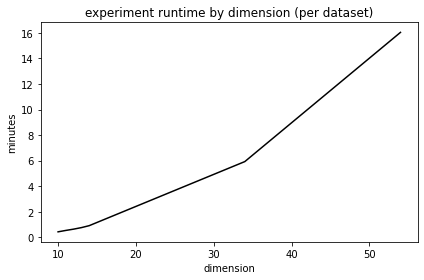

In [17]:
X = pd.DataFrame.from_dict(out2, orient='index').reset_index().values

plt.plot(X[:,[0]],X[:,[1]], color='k')
plt.title('experiment runtime by dimension (per dataset)')
plt.ylabel('minutes')
plt.xlabel('dimension')
plt.tight_layout()
plt.savefig('runtime_by_dim.png', dpi=300)